# Read Dataset

In [55]:
import pandas as pd

In [56]:
df = pd.read_csv('diabetes.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
df.shape

(768, 9)

In [60]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Cleaning Data

In [61]:
df.duplicated().sum()

np.int64(0)

In [62]:
df.duplicated().shape

(768,)

No Duplicated Records

In [63]:
cols = [col for col in df.columns]
print("Columns:", cols)

Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [64]:
df[cols].nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [65]:
df.isnull().sum()/df.shape[0] * 100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

No null values found

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'Box plot of Age')

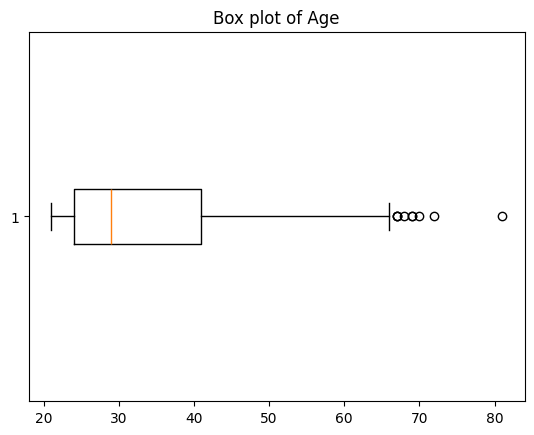

In [67]:
import matplotlib.pyplot as plt
plt.boxplot(df['Age'], vert=False)
plt.title('Box plot of Age')

# Remove Outliers

In [68]:
mean = df['Age'].mean()
std = df['Age'].std()
lower_bound = mean - 1 * std
upper_bound = mean + 3 * std
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
df_processed = df[((df['Age'] >= lower_bound) | (df['Age'] <= upper_bound))]

In [69]:
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 21.48065387598798, Upper Bound: 68.52158003870272


In [70]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [71]:
df_processed.head(1000)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [72]:
outliers.shape

(68, 9)

In [73]:
outliers.head(1000)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
55,1,73,50,10,0,23.0,0.248,21,0
60,2,84,0,0,0,0.0,0.304,21,0
90,1,80,55,0,0,19.1,0.258,21,0
94,2,142,82,18,64,24.7,0.761,21,0
...,...,...,...,...,...,...,...,...,...
684,5,136,82,0,0,0.0,0.640,69,0
713,0,134,58,20,291,26.4,0.352,21,0
721,1,114,66,36,200,38.1,0.289,21,0
736,0,126,86,27,120,27.4,0.515,21,0


# Correlation Matrix

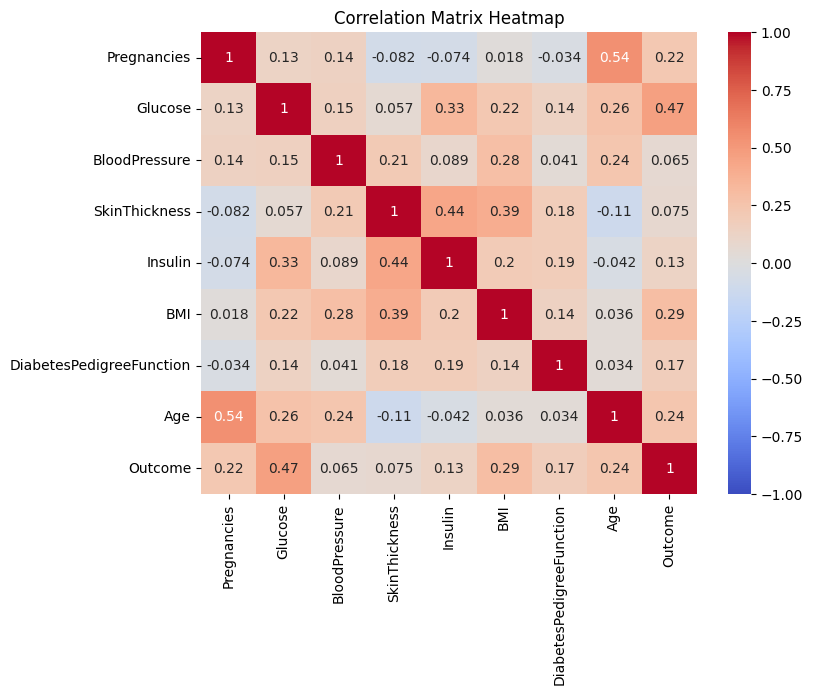

In [74]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

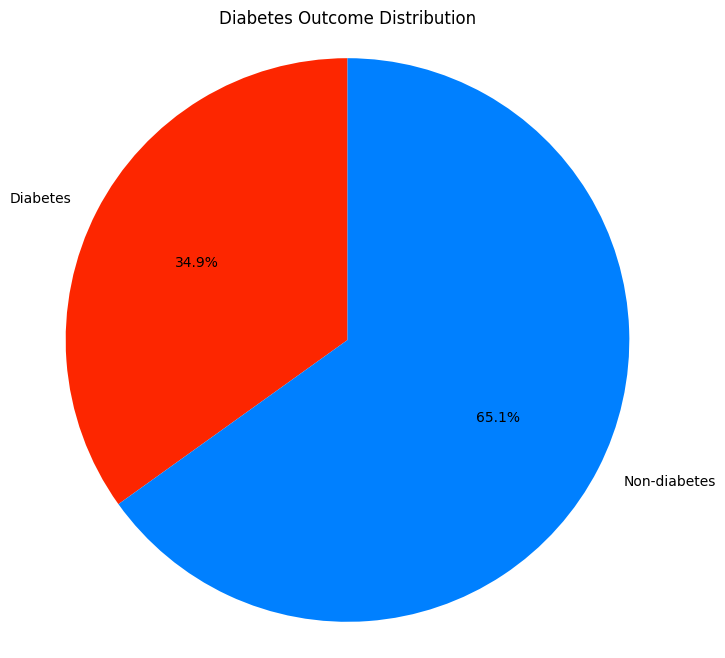

In [75]:
categories = ['Diabetes', 'Non-diabetes']
values = [df_processed['Outcome'].eq(1).sum(), df_processed['Outcome'].eq(0).sum()]
colors = ["#fd2600", "#0080ff"] 

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Diabetes Outcome Distribution')
plt.axis('equal')
plt.show()

# Feature Scaling

In [76]:
x = df_processed[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df_processed['Outcome']

In [77]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [78]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = [col for col in x.columns]
x[num_cols] = scaler.fit_transform(x[num_cols])
x.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_17580\537624294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[num_cols] = scaler.fit_transform(x[num_cols])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


# Save

In [80]:
x.to_csv('x_data.csv', index=False)
y.to_csv('y_data.csv', index=False)

import joblib
joblib.dump(scaler, 'scaler_diabetes.save')

['scaler_diabetes.save']